Dependencias:

In [1]:
import tensorflow as t
from tensorflow import keras as k

import os
import numpy as n


import matplotlib.pyplot as p

# Cargamos el modelo preentrenado ResNet50
from keras.preprocessing import image
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input
from keras.applications.resnet import decode_predictions

In [2]:
# Instanciamos ResNet50
resnet = ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

In [3]:
data_folder = 'data'

1/1 [==============================] - 3s 3s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[('n01491361', 'tiger_shark', 0.926234), ('n01484850', 'great_white_shark', 0.028222326), ('n02640242', 'sturgeon', 0.021404522), ('n02536864', 'coho', 0.0039971885), ('n01494475', 'hammerhead', 0.0025324074)]


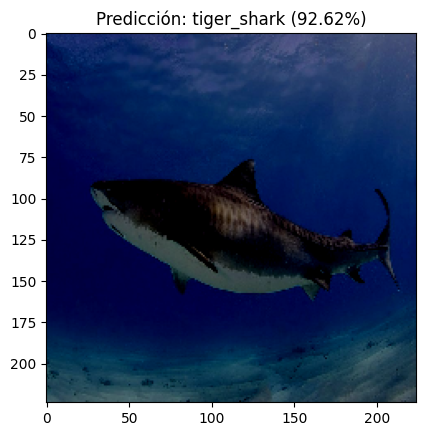

In [4]:
img = image.image_utils.load_img(os.path.join(data_folder,'Tiger_shark.jpg'), target_size=(224, 224))
img = image.image_utils.img_to_array(img)

x = preprocess_input(n.expand_dims(img, axis=0))
preds = resnet.predict(x)
decoded_preds = decode_predictions(preds, top=5)[0]

print(decoded_preds)

p.title('Predicción: ' + decoded_preds[0][1] + ' (' + str(round(decoded_preds[0][2] * 100,2)) + '%)')
p.imshow(img / 255) # Normalizamos la imagen


In [6]:
predictions = [(p[1],p[2]) for p in decoded_preds]
print(predictions)

[('tiger_shark', 0.926234), ('great_white_shark', 0.028222326), ('sturgeon', 0.021404522), ('coho', 0.0039971885), ('hammerhead', 0.0025324074)]
